In [ ]:
! pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import scipy.optimize as sco
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import yfinance as yf

import seaborn as sns
sns.set(style="darkgrid")

## Оптимизация портфеля по Марковицу

Портфельная теория Марковица была обнародована в 1952 году. Позже автор получил за нее Нобелевскую премию.

Целью модели является составление оптимального портфеля, то есть с минимальным риском и максимальной доходностью.

Как правило, решается две задачи: максимизация доходности при заданном уровне риска и минимизация риска при минимально допустимом значении доходности.

Доходность портфеля измеряется как средневзвешенная сумма доходностей входящих в него бумаг.

### Постановка задачи

Пусть у нас есть n активов с ожидаемыми доходностями $\mu_i$, стандартными отклонениями $\sigma_i$, корреляциями $\rho_{i, j}$. Инвестиционный портфель задан весами $x_i$. Какие веса активов в портфеле минимизируют риск при фиксированной ожидаемой доходности?  
\begin{equation*}
x = 
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{bmatrix}
\mu = 
\begin{bmatrix}
\mu_1 \\
\mu_2 \\
\vdots \\
\mu_n \\
\end{bmatrix}
S = 
\begin{bmatrix}
\sigma_1^2 & \rho_{1,2}\sigma_1\sigma_2 &\ldots &\rho_{1,n}\sigma_1\sigma_n \\
\rho_{2,1}\sigma_2\sigma_1 & \sigma_2^2 &\ldots &\rho_{2,n}\sigma_2\sigma_n \\
\vdots & \vdots & & \vdots\\
\rho_{n,1}\sigma_n\sigma_1 & \rho_{n,2}\sigma_n\sigma_2 &\ldots & \sigma_n^2  \\
\end{bmatrix}
\end{equation*}

Задача квадратичного программирования

\begin{equation*}
\begin{cases}
x^{T}Sx  \rightarrow min \\
\mu^Tx = r \\
\sum{x_i} = 1\\
x \ge 0
\end{cases}
\end{equation*}

### Решение задачи оптимизации

Записываем лагранжиан:

$$L(x, \lambda, \mu) = x^T S x - \lambda_1(x^T \mu - r) - \lambda_2(x^T\overline{e} - 1)$$
$$\frac{dL}{dx} = 2Sx - \lambda_1\mu - \lambda_2 \overline{e}  = 0 \Rrightarrow x^* = \frac{1}{2}S^{-1}(\lambda_1\mu + \lambda_2\overline{e})$$

\begin{equation*}
\begin{cases}
\mu^T x^* = r \\
\overline{e}^T x^* =1
\end{cases}
\Rrightarrow
\begin{cases}
\frac{1}{2}\mu^TS^{-1}(\lambda_1\mu + \lambda_2 \overline{e}) = r \\
\frac{1}{2}\overline{e}^T S^{-1}(\lambda_1\mu + \lambda_2 \overline{e}) = 1
\end{cases}
\Rrightarrow
\begin{cases}
\mu^TS^{-1}(\lambda_1\mu + \lambda_2 \overline{e}) = 2r \\
\overline{e}^T S^{-1}(\lambda_1\mu + \lambda_2 \overline{e}) = 2
\end{cases}
\Rrightarrow
\begin{cases}
(\mu^TS^{-1}\mu)\lambda_1 + (\mu^TS^{-1} \overline{e})\lambda_2 = 2r \\
(\overline{e}^T S^{-1}\mu)\lambda_1 + (\overline{e}^T S^{-1}\overline{e})\lambda_2 = 2
\end{cases}
\end{equation*}

Положим:

$a = \mu^TS^{-1}\mu,\ \ \ b = \mu^TS^{-1} \overline{e},\ \ \ c = \overline{e}^T S^{-1}\overline{e}$

\begin{equation*}
\begin{cases}
a\lambda_1 + b\lambda_2 = 2r\\
b\lambda_1 + c\lambda_2 = 2
\end{cases}
\Rrightarrow
\begin{bmatrix}
a & b \\
b & c 
\end{bmatrix}
\begin{bmatrix}
\lambda_1 \\
\lambda_2 
\end{bmatrix}
= 2
\begin{bmatrix}
r \\
1 
\end{bmatrix}

\end{equation*}



\begin{equation*}
\begin{bmatrix}
\lambda_1 \\
\lambda_2 
\end{bmatrix}
= 2
\begin{bmatrix}
a & b \\
b & c 
\end{bmatrix}^{-1}
\begin{bmatrix}
r \\
1 
\end{bmatrix}
= 
\frac{2}{ac - b^2}
\begin{bmatrix}
c & -b \\
-b & a 
\end{bmatrix}
\begin{bmatrix}
r \\
1 
\end{bmatrix}
= 
\frac{2}{ac - b^2}
\begin{bmatrix}
cr -b \\
a - br 
\end{bmatrix}

\end{equation*}

Подставляем в исходное выражение:

$$x^* = \frac{1}{2}S^{-1}(\lambda_1\mu + \lambda_2\overline{e}) = \frac{S^{-1}}{ac-b^2}\left((cr - b)\mu + (a - br)\overline{e}\right)$$


Доходность бумаги вычисляется следующим образом 

$$R_t = \frac{price_t}{price_{t- 1}} - 1$$

Коэффициент Шарпа:

$$SR(u) = \frac{R(u) - R_f}{\sigma(u)}$$
$$u= [u_1, u_2, u_3, u_4]$$
$$\sum{u_k} = 1$$

Так как мы хотим максимизировать отношение шарпа и $R_f$ общий множитель для всех слагаемых, мы можем им пренебречь
$$R(u)_{portfolio} = u^TR$$
$$\sigma(u) = \sqrt{u^T\Sigma u}$$
$$SR(u)\approx \frac{u^TR_{portfolio}}{\sqrt{u^t\Sigma u}}$$

### Примеры некоторых активов

* [Vanguard Total World Stock Index Fund (VT)](https://finance.yahoo.com/quote/VT/) 
    
    **Fund Summary**
    
    The fund employs an indexing investment approach designed to track the performance of the FTSE Global All Cap Index. The advisor attempts to sample the target index by investing all, or substantially all, of its assets in common stocks in the index and by holding a representative sample of securities that resembles the full index in terms of key risk factors and other characteristics.
    
* [FinEx MSCI USA UCITS ETF (FXUS.ME)](https://finance.yahoo.com/quote/FXUS.ME/)
* [FinEx MSCI China UCITS ETF (FXCN.ME)](https://finance.yahoo.com/quote/FXCN.ME/)
* [FinEx MSCI Germany UCITS ETF (FXDE.ME)](https://finance.yahoo.com/quote/FXDE.ME/)
* [Public Joint Stock Company Aeroflot - Russian Airlines (AFLT.ME)](https://finance.yahoo.com/quote/AFLT.ME/)
* [Public Joint Stock Company Acron (AKRN.ME)](https://finance.yahoo.com/quote/AKRN.ME/)
* [Public Joint Stock Company "Cherkizovo Group" (GCHE.ME)](https://finance.yahoo.com/quote/GCHE.ME/)
* [Public Joint Stock Company Mining and Metallurgical Company Norilsk Nickel (GMKN.ME)](https://finance.yahoo.com/quote/GMKN.ME/)
* [PJSC LUKOIL (LKOH.ME)](https://finance.yahoo.com/quote/LKOH.ME/)
* [MOEX Russia Index (IMOEX.ME)](https://finance.yahoo.com/quote/IMOEX.ME?p=IMOEX.ME)
* [Mobile TeleSystems Public Joint Stock Company (MTSS.ME)](https://finance.yahoo.com/quote/MTSS.ME/)
* [PJSC Tatneft (TATNP.ME)](https://finance.yahoo.com/quote/TATNP.ME/)
* [ProShares UltraPro S&P500 (UPRO)](https://finance.yahoo.com/quote/UPRO/)
    
    **Fund Summary**

    The fund invests in financial instruments that ProShare Advisors believes, in combination, should produce daily returns consistent with the fund's investment objective. The index is a measure of large-cap U.S. stock market performance. The fund is non-diversified.

* [iShares Core S&P 500 ETF (IVV)](https://finance.yahoo.com/quote/IVV/)
* [iShares 1-5 Year Investment Grade Corporate Bond ETF (IGSB)](https://finance.yahoo.com/quote/igsb/)
* [Xtrackers Stoxx Europe 600 UCITS ETF 1C (DX2X.DE)](https://finance.yahoo.com/quote/dx2x.de/)
* [X II EUR Corporate Bond ETF 1C (D5BG.DE)](https://uk.finance.yahoo.com/quote/D5BG.DE/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAKa7DgG84L8TGO-h98hN5aFiMTHqFvrTe9-QPghSno-W5OAyusA6C-jbpFXOK_0Gn8_ILYBH96oR5mKa33KNDjpKngAZEDRJAFyfCvTJ5ug8bfRNFpZW8GSX3d9S28FWNRKY361GbFY0iU2-vTacnFUQu76q5J_ogb5YsD38gVeL)
* [SPDR S&P 500 ETF Trust (SPY)](https://finance.yahoo.com/quote/SPY/)
* [iShares Core U.S. Aggregate Bond ETF (AGG)](https://finance.yahoo.com/quote/AGG/)
* [Vanachai Group Public Company Limited (VNG.BK)](https://finance.yahoo.com/quote/VNG.BK/)
* [Gold Aug 23 (GC=F)](https://finance.yahoo.com/quote/GC=F/)
* [Russian Government Bond Index C (RGBI.ME)](https://finance.yahoo.com/quote/RGBI.ME/)
* [MOEX Total Return (MCFTR.ME)](https://finance.yahoo.com/quote/MCFTR.ME/history/)


## Реализация

In [1108]:
import datetime
import yfinance as yfin
import matplotlib.cm as cm
from scipy.optimize import minimize
import tabulate

In [1109]:
def findEfficientFrontier(meanReturn, expectedReturn, cov_matrix):
    
    size = meanReturn.size
    
    returns_linspace = np.linspace(expectedReturn.min(), expectedReturn.max(), 50)

    minimizeVolatility = lambda w: np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
    getReturns         = lambda w: np.sum(meanReturn * w)
    CheckSumOne        = lambda w: np.sum(w) - 1

    w0 = np.ones(size) / size

    bounds = tuple([(0, 1)]* size)

    volatility_opt = []
    for ret in returns_linspace:
        constraints = ({"type":"eq", "fun":CheckSumOne}, 
                       {"type":"eq", "fun":lambda w: getReturns(w) - ret})
        opt = minimize(minimizeVolatility, w0,  method='SLSQP', bounds=bounds, constraints=constraints)
        volatility_opt.append(opt['fun'])
    
    volatility_opt = np.array(volatility_opt)
    
    return volatility_opt, returns_linspace
    

In [1110]:
def findMaximumSharpRatio(meanReturn, cov_matrix, risk_free_rate):

    size = meanReturn.shape[0]
    
    def negativeSR(w):
        ret = np.sum(meanReturn * w)
        std = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
        SharpRatio = (ret - risk_free_rate) / std
        return -1 * SharpRatio
    
    w0 = np.ones(size) / size
    
    bounds = tuple([(0, 1)]* size)
    
    constraints = ({"type":"eq", "fun":lambda x: np.sum(x) - 1})

    w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints=constraints)
    return w_opt.x, -1*w_opt['fun'], np.sqrt(np.dot(w_opt.x.T, np.dot(cov_matrix, w_opt.x)))

In [1111]:
def getRandomPortfolio(meanReturn, risk_free_rate,cov_matrix, portfolio_num = 10000):
    size = meanReturn.size
    # макссив весов портфелей
    weight = np.zeros((portfolio_num, size))
    
    # ожидаемая доходность по портфелям
    expectedReturn = np.zeros(portfolio_num)
    
    # ожидаемая волатильность по портфелям
    expectedVolatility = np.zeros(portfolio_num)
    
    # отношение шарпа по портфелям
    sharpRatio = np.zeros(portfolio_num)
    np.random.seed(42)
    for k in range(portfolio_num):

        w = np.array(np.random.random(size))
        w = w / np.sum(w)
        weight[k, :] = w 
        
        expectedReturn[k]     = np.sum(meanReturn * w)
        expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
        sharpRatio[k]         = (expectedReturn[k] - risk_free_rate) / expectedVolatility[k]
        
    return expectedReturn, expectedVolatility, sharpRatio, weight

In [1112]:
def plotEfficientFrontier(expectedVolatility,expectedReturn, sharpRatio, meanReturn, cov_matrix, col_name):
  
     
   
    size = meanReturn.size
    
    plt.subplots(figsize=(20, 6))
    
    volatility_opt, returns_linspace =  findEfficientFrontier(meanReturn, expectedReturn, cov_matrix)

    # график сгенерированных портфелей
    pcm = plt.scatter(expectedVolatility, expectedReturn, s=10, c=sharpRatio, alpha=0.8)
    
    plt.xlabel("Риск (стандартное отклонение)")
    plt.ylabel("Ожидаемая доходность")
    plt.title("Оптимизация портфеля по Марковицу")

    ans = []
    # наношу доходности активов на график
    for i in range(size):
        tmp = np.zeros(size)
        tmp[i] = 1
        V =  np.sqrt(np.dot(tmp.T, np.dot(cov_matrix, tmp)))
        R = np.sum(meanReturn * tmp) 
        ans += [[V, R]]
        plt.annotate(col_name[i], (V, R),  xytext=(10,0), textcoords='offset points')

    ans = np.array(ans)
    # оптимальная поверхность
    plt.plot(volatility_opt, returns_linspace, '--')

    # рисуем точки-активы
    plt.scatter(ans[:, 0], ans[:, 1],  marker='o', s=100, c='blue', edgecolors='black' )
    plt.colorbar(pcm, label='Коэффициент Шарпа')
    plt.show()
    
        
    


In [1113]:
def get_portfolio_data(col_name, start, end, risk = 0.02, plot=False, portfolio_num=10000):
    
    # скачивание информации по тикерам за выбранные промежутки
    print("-"*24, " Загразка данных ", "-"*25)
    stocks = yf.download(col_name, start, end).Close
    print("-"*68)
    
    stocks = stocks.dropna()
    risk_free_rate = 0.00

    # доходность по каждой бумаге
    returns    = stocks.pct_change()
    # матрица коварианций
    cov_matrix = returns.cov()
    # усредненный доход по каждой бумеге
    meanReturn = returns.mean()


    opt, SR, risk = findMaximumSharpRatio(meanReturn, cov_matrix, risk_free_rate)

    print(f"Максимальное отношение Шарпа: {np.round(SR, 2)}")
    print("-"*68)
    print("Коэффициенты для максимального отношения шарпа: ")
    ans = np.vstack((col_name,opt))
    results = tabulate.tabulate(ans.T,tablefmt= "plain")
    print(results)
    print("-"*68)

    expectedReturn, expectedVolatility, sharpRatio, _ =  getRandomPortfolio(meanReturn,
                                                                            risk_free_rate, cov_matrix, 
                                                                            portfolio_num=portfolio_num)

    if plot:
        plotEfficientFrontier(expectedVolatility,expectedReturn, sharpRatio,meanReturn,cov_matrix, col_name )
    

## Тесты

In [1114]:
# временные промежутки, за которые рассматриваем данные
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2023, 1, 22)

# список тикеров в портфель
col_name = ['CEVA', 'GOOGL', 'TSLA', 'GC=F',  'ES=F']
col_name_lector = ['VT', 'FXUS.ME', 'FXCN.ME', 'FXDE.ME']
col_name_assets_1 = ['AFLT.ME', 'AKRN.ME', 'GCHE.ME', 'GMKN.ME', 'LKOH.ME', 'MOEX.ME', 'MTSS.ME', 'TATNP.ME', 'UPRO.ME']
col_name_foreign = ['IVV', 'IGSB', 'DX2X.DE','D5BG.DE' ]

### Пример 1. Портфель из российских акций

В этом примере рассмотрим портфель, который состоит из следующих акций:
* [Public Joint Stock Company Aeroflot - Russian Airlines (AFLT.ME)](https://finance.yahoo.com/quote/AFLT.ME/)
* [Public Joint Stock Company Acron (AKRN.ME)](https://finance.yahoo.com/quote/AKRN.ME/)
* [Public Joint Stock Company "Cherkizovo Group" (GCHE.ME)](https://finance.yahoo.com/quote/GCHE.ME/)
* [Public Joint Stock Company Mining and Metallurgical Company Norilsk Nickel (GMKN.ME)](https://finance.yahoo.com/quote/GMKN.ME/)
* [PJSC LUKOIL (LKOH.ME)](https://finance.yahoo.com/quote/LKOH.ME/)
* [MOEX Russia Index (IMOEX.ME)](https://finance.yahoo.com/quote/IMOEX.ME?p=IMOEX.ME)
* [Mobile TeleSystems Public Joint Stock Company (MTSS.ME)](https://finance.yahoo.com/quote/MTSS.ME/)
* [PJSC Tatneft (TATNP.ME)](https://finance.yahoo.com/quote/TATNP.ME/)
* [ProShares UltraPro S&P500 (UPRO)](https://finance.yahoo.com/quote/UPRO/)

Работа моей реализации

In [1116]:
assets_my_1 = ['AFLT.ME', 'AKRN.ME', 'GCHE.ME', 'GMKN.ME', 'LKOH.ME', 'MOEX.ME', 'MTSS.ME', 'TATNP.ME', 'UPRO.ME']

------------------------  Загразка данных  -------------------------
[*********************100%***********************]  9 of 9 completed
--------------------------------------------------------------------
Максимальное отношение Шарпа: 0.08
--------------------------------------------------------------------
Коэффициенты для максимального отношения шарпа: 
AFLT.ME   2.68941e-18
AKRN.ME   0.38381
GCHE.ME   0.227617
GMKN.ME   0.14429
LKOH.ME   0
MOEX.ME   0.0429433
MTSS.ME   0.0356953
TATNP.ME  0.165644
UPRO.ME   4.31351e-18
--------------------------------------------------------------------


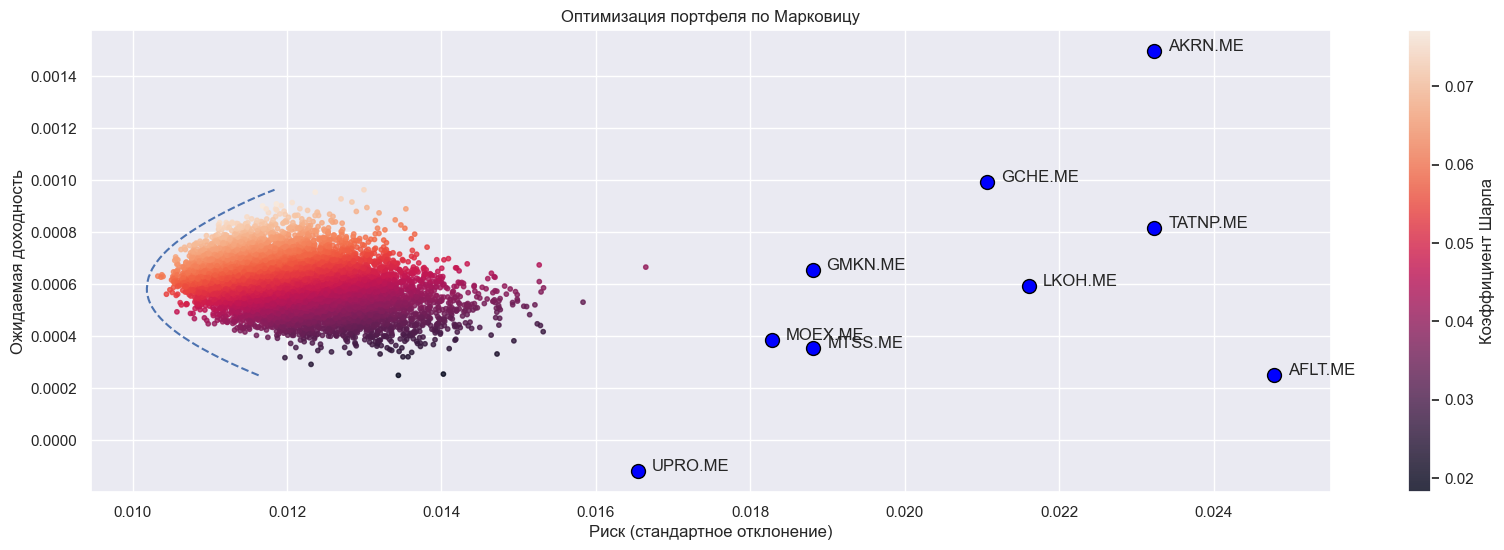

In [1117]:
get_portfolio_data(assets_my_1, start, end, 0.02, True)

Работа пакетной реализации

In [1118]:
import okama as ok
assets_ok_1 = ['AFLT.MOEX', 'AKRN.LSE', 'GCHE.MOEX', 'GMKN.MOEX', 'LKOH.MOEX', 'MOEX.MOEX', 'MTSS.MOEX', 'TATNP.MOEX', 'UPRO.MOEX']

Оптимальные веса для минимального риска: 
 [0.01 0.23 0.21 0.14 0.   0.01 0.13 0.03 0.24]
Оптимальные веса для максимального SR: 
 [0.   0.3  0.26 0.2  0.   0.02 0.08 0.14 0.  ]


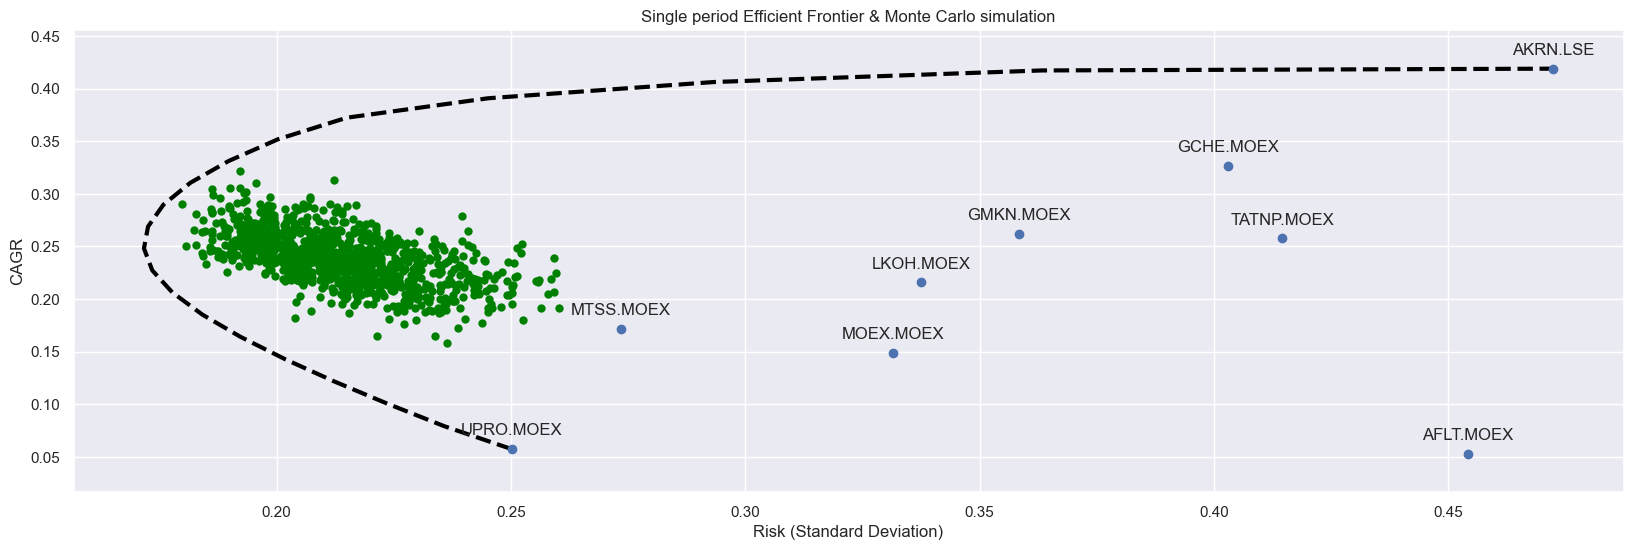

In [1127]:
y = ok.EfficientFrontier(assets_ok_1, ccy='RUB', first_date=start, last_date=end)

test_1_optimal_weight_small_risk = y.gmv_weights
test_1_optimal_weight_max_sharp_ratio = y.get_tangency_portfolio()['Weights']

print("Оптимальные веса для минимального риска: \n", np.round(test_1_optimal_weight_small_risk, 2))
print("Оптимальные веса для максимального SR: \n", np.round(test_1_optimal_weight_max_sharp_ratio, 2))


fig = plt.figure(figsize=(20, 6))
y.plot_assets(kind='cagr')
ax = plt.gca()
mc = y.get_monte_carlo(n=1000, kind='cagr')
ax.scatter(mc.Risk, mc.CAGR, linewidth=0, color='green')
df = y.ef_points
ax.plot(df['Risk'], df['CAGR'], color='black', linestyle='dashed', linewidth=3)
ax.set_title('Single period Efficient Frontier & Monte Carlo simulation')
ax.set_xlabel('Risk (Standard Deviation)')
ax.set_ylabel('CAGR')
plt.show();

Теперь посмотрим, как менялясь стоимость различных портфелей с течением времени. Рассмотрим следующие портфели:
* с максимальным индексом Шарпа
* с минимальной волатильностью
* с ребалансировками

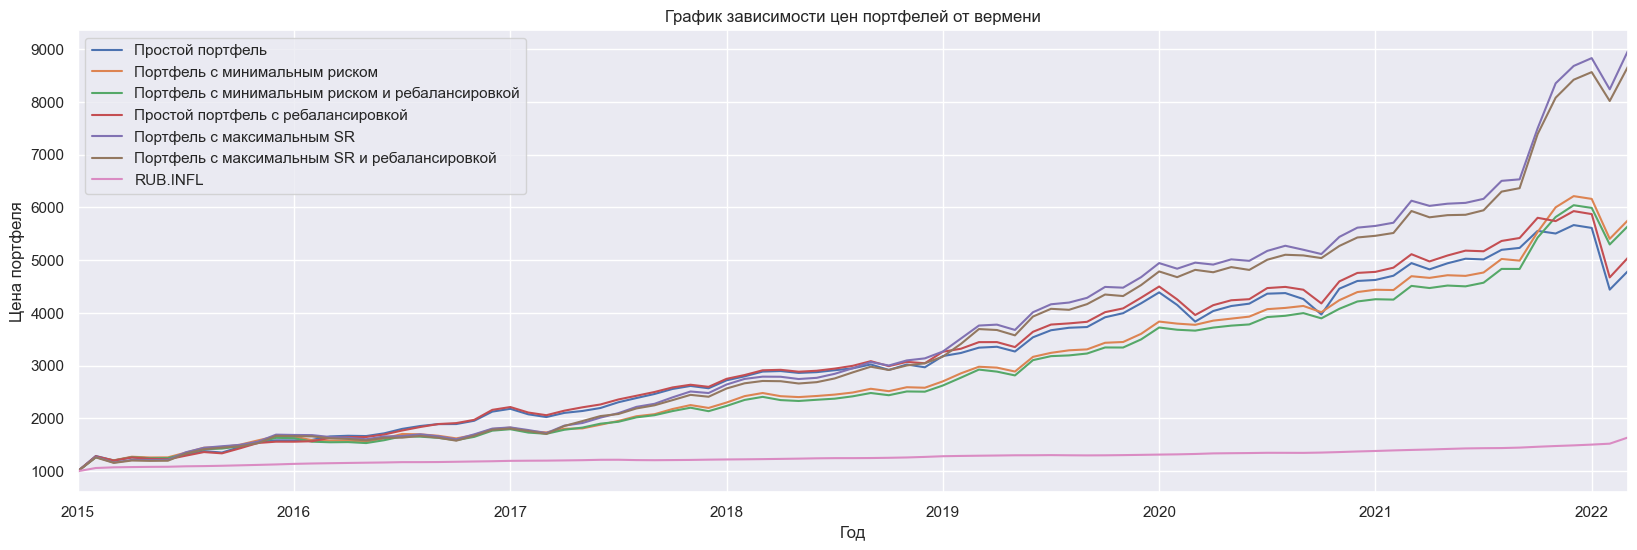

In [1120]:
pf1 = ok.Portfolio(assets_ok_1, ccy='RUB', symbol="Простой портфель", first_date=start, last_date=end)
pf1_2 = ok.Portfolio(assets_ok_1, ccy='RUB', symbol="Простой портфель c ребалансировкой", first_date=start, last_date=end,rebalancing_period='year')
pf1_1 = ok.Portfolio(assets_ok_1, weights=test_1_optimal_weight_small_risk, ccy='RUB', first_date=start, last_date=end, symbol="Портфель с минимальным риском")
pf1_3 = ok.Portfolio(assets_ok_1, weights=test_1_optimal_weight_small_risk, ccy='RUB', first_date=start, last_date=end, symbol="Портфель с минимальным риском и ребалансировкой", rebalancing_period='year')
pf1_4 = ok.Portfolio(assets_ok_1, weights=test_1_optimal_weight_max_sharp_ratio, ccy='RUB', first_date=start, last_date=end, symbol="Портфель с максимальным SR")
pf1_5 = ok.Portfolio(assets_ok_1, weights=test_1_optimal_weight_max_sharp_ratio, ccy='RUB', first_date=start, last_date=end, symbol="Портфель с максимальным SR и ребалансировкой", rebalancing_period='year')

all1 = ok.AssetList([pf1, pf1_1, pf1_3, pf1_2, pf1_4, pf1_5], ccy='RUB')
all1.wealth_indexes.plot(figsize=(20, 6),xlabel="Год", ylabel="Цена портфеля", title="График зависимости цен портфелей от вермени");

Посмотрим основные характеристики портфелей

In [1121]:
all1.describe()

,property,period,Простой портфель,Портфель с минимальным риском,Портфель с минимальным риском и ребалансировкой,Простой портфель c ребалансировкой,Портфель с максимальным SR,Портфель с максимальным SR и ребалансировкой,inflation
0,Compound return,YTD,-0.154548,-0.074225,-0.066209,-0.149691,0.032113,0.02853,0.099468
1,CAGR,1 years,-0.031286,0.224969,0.250154,-0.013902,0.46235,0.459975,0.166951
2,CAGR,5 years,0.187616,0.270688,0.26966,0.195832,0.39065,0.383655,0.064053
3,CAGR,10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CAGR,"7 years, 3 months",0.241209,0.272976,0.269561,0.250039,0.353197,0.346866,0.070493
5,Dividend yield,LTM,0.079905,0.073266,0.079224,0.085948,0.067586,0.075963,NaN
6,Risk,"7 years, 3 months",0.204702,0.173014,0.171441,0.200021,0.201,0.200375,NaN
7,CVAR,"7 years, 3 months",0.055962,-0.064246,-0.063885,0.037976,-0.045021,-0.051178,NaN
8,Max drawdowns,"7 years, 3 months",-0.2159,-0.130188,-0.123183,-0.211799,-0.08399,-0.08234,NaN
9,Max drawdowns dates,"7 years, 3 months",2022-02,2022-02,2022-02,2022-02,2015-03,2015-03,NaN


### Пример 2. Портфель, составленный из основных индексов

В этом примере рассмотрим портфель, который состоит из следующих индексов:
* `IVV` 
    
    Этот ETF отслеживает индекс S&P 500, в который входят многие крупные и известные фирмы США.

    [iShares Core S&P 500 ETF (IVV)](https://finance.yahoo.com/quote/IVV/)

* `IGSB` 

    Это биржевой инвестиционный фонд, который стремится отслеживать показатели индекса ICE BofA 1-5 Year US Corporate Index.
    Данный индекс состоит из номинированных в долларах США корпоративных облигаций инвестиционного класса, до погашения которых остается от 1 до 5 лет.

    [iShares 1-5 Year Investment Grade Corporate Bond ETF (IGSB)](https://finance.yahoo.com/quote/igsb/)

* `DX2X` 

    Отражает эффективность акций 600 компаний в 18 европейских странах

    [Xtrackers Stoxx Europe 600 UCITS ETF 1C (DX2X.DE)](https://finance.yahoo.com/quote/dx2x.de/)

* `D5BG` 

    ETF предлагает прямые инвестиции в корпоративные облигации, деноминированные в евро. Включены только облигации инвестиционного класса. Широко диверсифицированы по эмитентам и кривой доходности.

    [X II EUR Corporate Bond ETF 1C (D5BG.DE)](https://uk.finance.yahoo.com/quote/D5BG.DE/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAKa7DgG84L8TGO-h98hN5aFiMTHqFvrTe9-QPghSno-W5OAyusA6C-jbpFXOK_0Gn8_ILYBH96oR5mKa33KNDjpKngAZEDRJAFyfCvTJ5ug8bfRNFpZW8GSX3d9S28FWNRKY361GbFY0iU2-vTacnFUQu76q5J_ogb5YsD38gVeL)

Работа моей реализации 

------------------------  Загразка данных  -------------------------
[*********************100%***********************]  4 of 4 completed
--------------------------------------------------------------------
Максимальное отношение Шарпа: 0.04
--------------------------------------------------------------------
Коэффициенты для максимального отношения шарпа: 
IVV      0
IGSB     0.342927
DX2X.DE  3.24176e-17
D5BG.DE  0.657073
--------------------------------------------------------------------


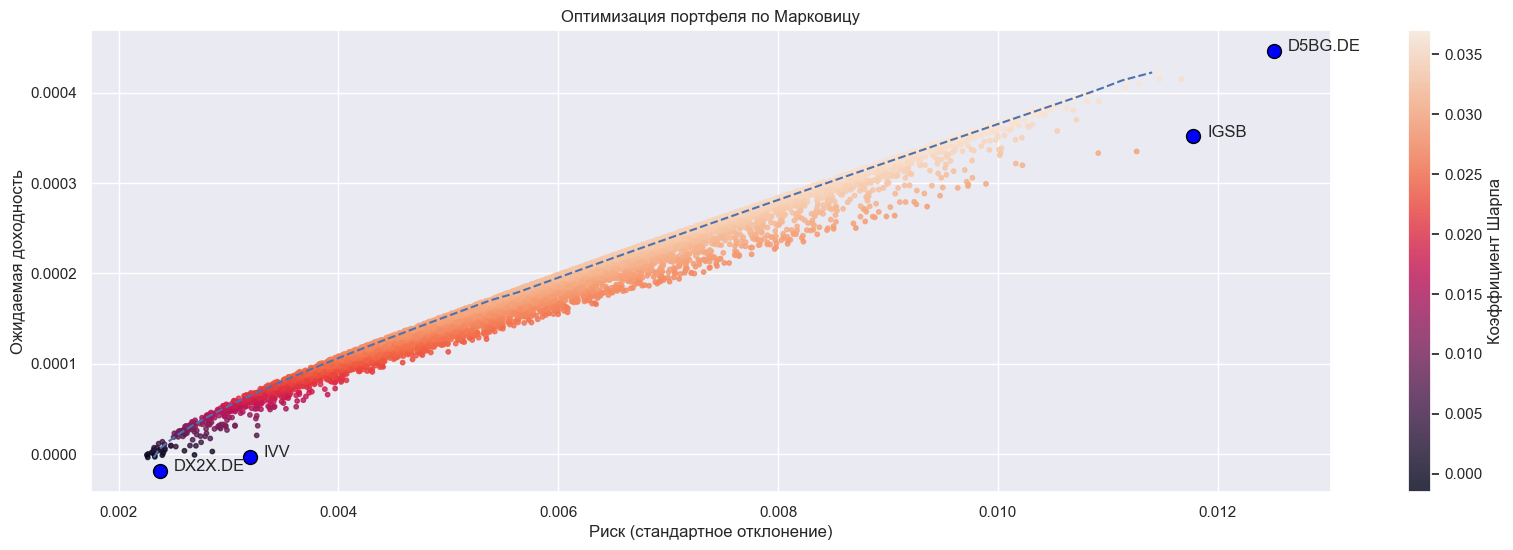

In [1122]:
asset_my_2 = ['IVV', 'IGSB', 'DX2X.DE','D5BG.DE' ]
get_portfolio_data(asset_my_2, start, end, 0.02, True)

Работа пакетной реализации

In [1123]:
asset_ok_2 = ['IVV.US', 'IGSB.US', 'DX2X.XETR','D5BG.XETR']

Оптимальные веса для минимального риска: 
 [0.16 0.71 0.13 0.  ]
Оптимальные веса для максимального SR: 
 [1. 0. 0. 0.]


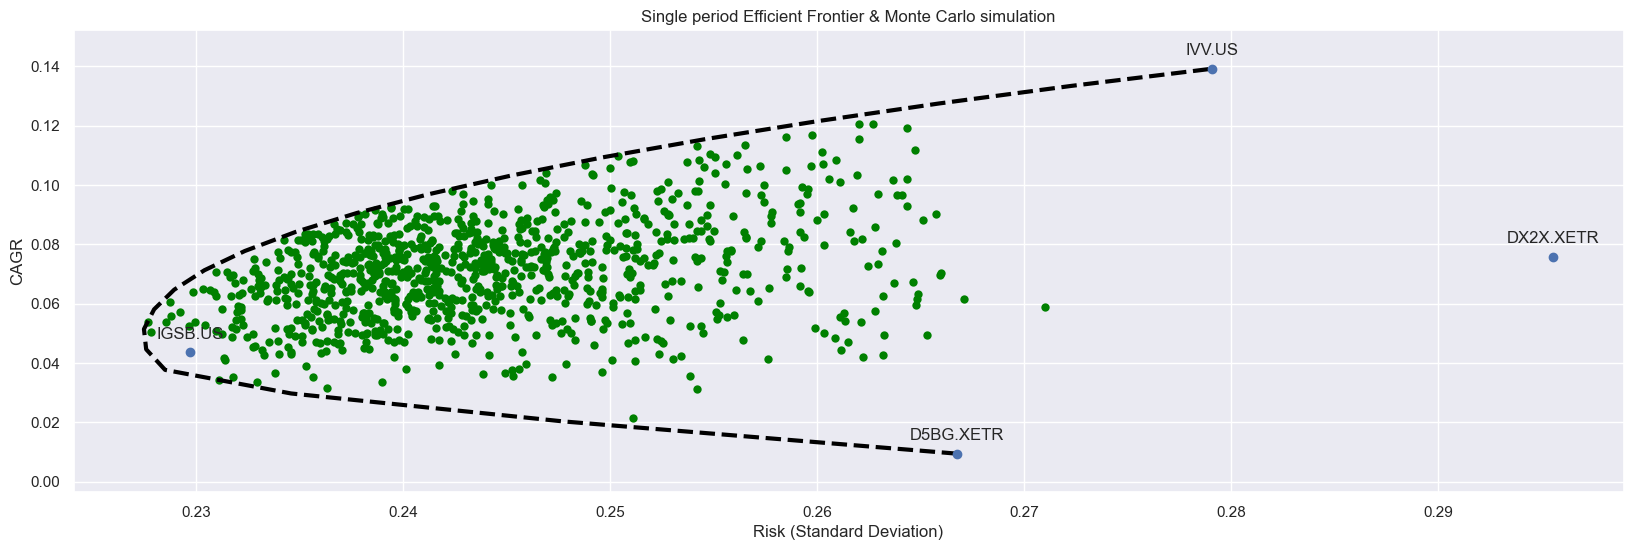

In [1124]:
y = ok.EfficientFrontier(asset_ok_2, ccy='RUB', first_date=start, last_date=end)

test_2_optimal_weight_small_risk = y.gmv_weights
test_2_optimal_weight_max_sharp_ratio = y.get_tangency_portfolio()['Weights']

print("Оптимальные веса для минимального риска: \n", np.round(test_2_optimal_weight_small_risk, 2))
print("Оптимальные веса для максимального SR: \n", np.round(test_2_optimal_weight_max_sharp_ratio, 2))


fig = plt.figure(figsize=(20, 6))
y.plot_assets(kind='cagr')
ax = plt.gca()
mc = y.get_monte_carlo(n=1000, kind='cagr')
ax.scatter(mc.Risk, mc.CAGR, linewidth=0, color='green')
df = y.ef_points
ax.plot(df['Risk'], df['CAGR'], color='black', linestyle='dashed', linewidth=3)
ax.set_title('Single period Efficient Frontier & Monte Carlo simulation')
ax.set_xlabel('Risk (Standard Deviation)')
ax.set_ylabel('CAGR')
plt.show();

Теперь посмотрим, как менялясь стоимость различных портфелей с течением времени. Рассмотрим следующие портфели:
* с максимальным индексом Шарпа
* с минимальной волатильностью
* с ребалансировками

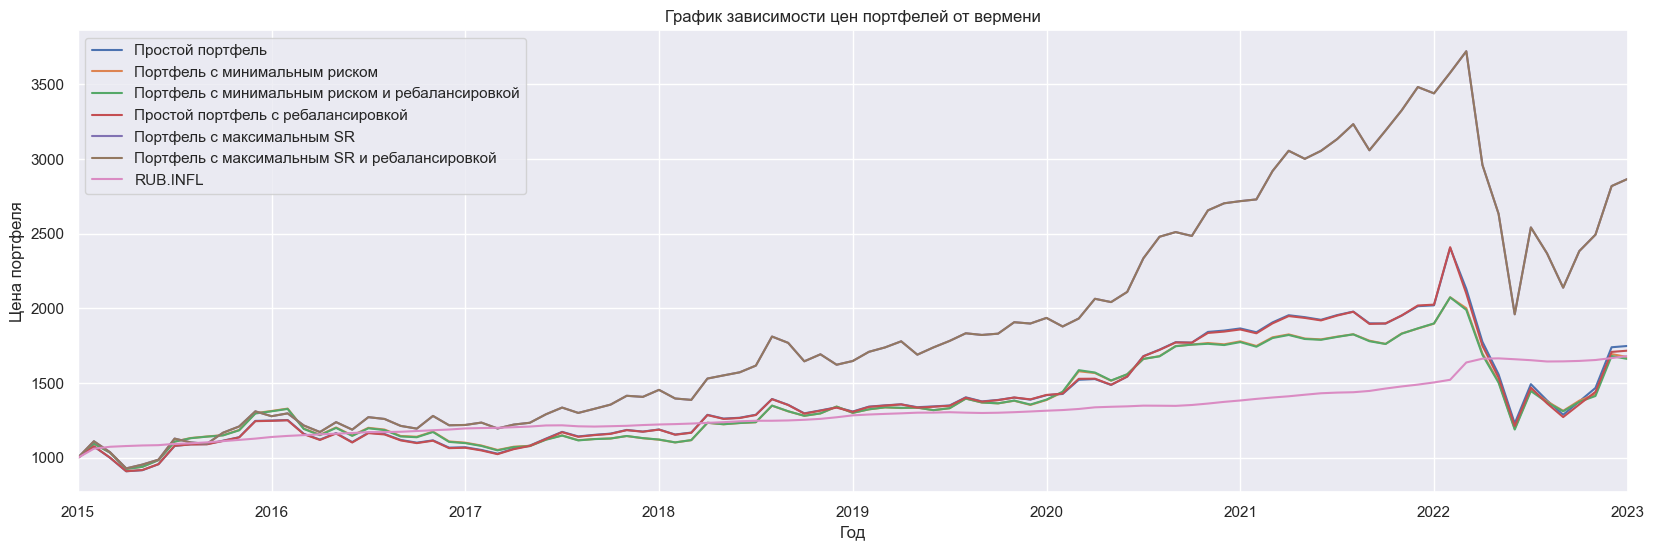

In [1125]:
pf2 = ok.Portfolio(asset_ok_2, ccy='RUB', symbol="Простой портфель", first_date=start, last_date=end)
pf2_2 = ok.Portfolio(asset_ok_2, ccy='RUB', symbol="Простой портфель c ребалансировкой",rebalancing_period='year', first_date=start, last_date=end)
pf2_1 = ok.Portfolio(asset_ok_2, weights=test_2_optimal_weight_small_risk, ccy='RUB', symbol="Портфель с минимальным риском", first_date=start, last_date=end)
pf2_3 = ok.Portfolio(asset_ok_2, weights=test_2_optimal_weight_small_risk, ccy='RUB', symbol="Портфель с минимальным риском и ребалансировкой", first_date=start, last_date=end, rebalancing_period='year')
pf2_4 = ok.Portfolio(asset_ok_2, weights=test_2_optimal_weight_max_sharp_ratio, ccy='RUB', first_date=start, last_date=end, symbol="Портфель с максимальным SR")
pf2_5 = ok.Portfolio(asset_ok_2, weights=test_2_optimal_weight_max_sharp_ratio, ccy='RUB', first_date=start, last_date=end, symbol="Портфель с максимальным SR и ребалансировкой", rebalancing_period='year')

all2 = ok.AssetList([pf2, pf2_1, pf2_3, pf2_2, pf2_4, pf2_5], ccy='RUB')
all2.wealth_indexes.plot(figsize=(20, 6),xlabel="Год", ylabel="Цена портфеля", title="График зависимости цен портфелей от вермени");

In [1126]:
all2.describe()

,property,period,Простой портфель,Портфель с минимальным риском,Портфель с минимальным риском и ребалансировкой,Простой портфель c ребалансировкой,Портфель с максимальным SR,Портфель с максимальным SR и ребалансировкой,inflation
0,Compound return,YTD,0.005028,-0.011984,-0.011984,0.005028,0.01711,0.01711,0.0084
1,CAGR,1 years,-0.134537,-0.117994,-0.125374,-0.152,-0.166364,-0.166364,0.117566
2,CAGR,5 years,0.080068,0.083415,0.08158,0.076323,0.145284,0.145284,0.065724
3,CAGR,10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CAGR,"8 years, 1 months",0.071631,0.065865,0.064852,0.069234,0.13921,0.13921,0.06645
5,Dividend yield,LTM,0.008356,0.015829,0.016086,0.008715,0.014926,0.014926,NaN
6,Risk,"8 years, 1 months",0.241523,0.229152,0.228828,0.241774,0.279095,0.279095,NaN
7,CVAR,"8 years, 1 months",0.360376,0.333545,0.335393,0.368202,0.358109,0.358109,NaN
8,Max drawdowns,"8 years, 1 months",-0.488458,-0.424017,-0.42645,-0.496651,-0.473097,-0.473097,NaN
9,Max drawdowns dates,"8 years, 1 months",2022-06,2022-06,2022-06,2022-06,2022-06,2022-06,NaN
